In [139]:
# inporting libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [140]:
#reading the dataset
df = pd.read_csv("/kaggle/input/age-weight-height-bmi-analysis/bmi.csv")
d = df.dropna()
d.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [141]:
d.value_counts("BmiClass")

BmiClass
Normal Weight    342
Overweight       166
Underweight       96
Obese Class 3     62
Obese Class 2     55
Obese Class 1     20
Name: count, dtype: int64

In [142]:
# encoding the non-int values to int
le = LabelEncoder()
d['type'] = le.fit_transform(d.BmiClass)
d.head()

,Age,Height,Weight,Bmi,BmiClass,type
0,61,1.85,109.30,31.935720,Obese Class 1,1
1,60,1.71,79.02,27.023700,Overweight,4
2,60,1.55,74.70,31.092612,Obese Class 1,1
3,60,1.46,35.90,16.841809,Underweight,5
4,60,1.58,97.10,38.896010,Obese Class 2,2


In [143]:
gx = d.drop(columns = 'type', axis = 1)
x = gx.drop(columns = 'BmiClass', axis = 1)
y = np.array(d["type"])

In [144]:
# normalizing the data
gf = StandardScaler()
gf.fit(x)
standardized_data = gf.transform(x)
x = standardized_data

In [145]:
#splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [146]:
# fitting and predicting the data
bmi = KNeighborsClassifier(n_neighbors=3)
bmi.fit(X_train, y_train)
y_pred = bmi.predict(X_test)
y_pred

array([5, 2, 0, 0, 0, 5, 5, 0, 4, 4, 0, 4, 0, 5, 2, 4, 0, 2, 0, 0, 0, 2,
       2, 5, 5, 5, 0, 0, 5, 4, 4, 4, 4, 2, 4, 5, 0, 5, 0, 4, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 5, 4, 4, 0, 5, 0, 0, 1, 0, 3, 3, 5, 0, 2, 0, 5, 4,
       4, 4, 3, 0, 4, 0, 0, 0, 4])

In [147]:
#checking the accuracy
print(round(accuracy_score(y_test, y_pred), 3))

0.96


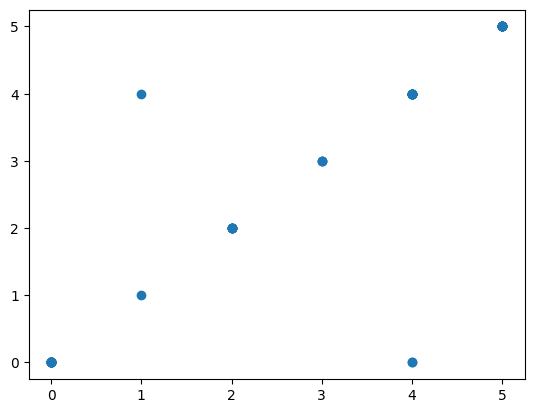

In [148]:
plt.scatter(y_test, y_pred)
plt.show()